# 전국 신규 민간 아파트 분양가격 동향

* 데이터셋 다운로드 위치 : https://www.data.go.kr/dataset/3035522/fileData.do

### 전국 평균 분양가격(2013년 9월부터 2015년 8월까지)
* 전국 공동주택의 3.3제곱미터당 평균분양가격 데이터를 제공

###  주택도시보증공사_전국 평균 분양가격(2019년 8월)_20190917
* 전국 공동주택의 연도별, 월별, 전용면적별 제곱미터당 평균분양가격 데이터를 제공
* 지역별 평균값은 단순 산술평균값이 아닌 가중평균값임

In [1]:
# 파이썬에서 쓸 수 있는 엑셀과도 유사한 판다스 라이브러리를 불러옵니다.
import pandas as pd

## 데이터 로드
### 최근 파일 로드
공공데이터 포털에서 "주택도시보증공사_전국 평균 분양가격(2019년 8월)_20190917"파일을 다운로드 받아 불러옵니다.
이 때, 인코딩을 설정을 해주어야 한글이 깨지지 않습니다.
보통 엑셀로 저장된 한글의 인코딩은 cp949 혹은 euc-kr로 되어 있습니다.
df_last 라는 변수에 최근 분양가 파일을 다운로드 받아 로드합니다.

데이터를 로드한 뒤 shape를 통해 행과 열의 갯수를 출력합니다.

In [2]:
df_last = pd.read_csv("data/주택도시보증공사_전국 평균 분양가격(2019년 8월)_20190917.csv", 
                      encoding="cp949")
df_last.shape

(3995, 5)

In [3]:
# head 로 파일을 미리보기 합니다.
df_last.head(3)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882


In [4]:
# tail 로도 미리보기를 합니다.
df_last.tail(3)

,지역명,규모구분,연도,월,분양가격(㎡)
3992,제주,전용면적 60㎡초과 85㎡이하,2019,8,3884
3993,제주,전용면적 85㎡초과 102㎡이하,2019,8,NaN
3994,제주,전용면적 102㎡초과,2019,8,3601


### 2015년 부터 최근까지의 데이터 로드
전국 평균 분양가격(2013년 9월부터 2015년 8월까지) 파일을 불러옵니다.
df_first 라는 변수에 담고 shape로 행과 열의 갯수를 출력합니다.
기본 인코딩은 utf-8로 설정이 되어있습니다. 공공데이터 중에는 한글인코딩으로 된 파일들이 많습니다. utf-8로 로드된 데이터의 한글이 깨져보인다면 encoding을 cp949로 지정하면 됩니다.
euc-kr(2350자)로 지정해도 되지만 cp949(11172자)로 표현하면 더 많은 한글을 표현할 수 있습니다.

In [5]:
df_first = pd.read_csv("data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv", 
                      encoding="cp949")
df_first.shape

(17, 22)

In [6]:
# df_first 변수에 담긴 데이터프레임을 head로 미리보기 합니다.
df_first.head(3)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795


In [7]:
# df_first 변수에 담긴 데이터프레임을 tail로 미리보기 합니다.
df_first.tail(3)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


### 데이터 요약하기

In [8]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Data columns (total 5 columns):
지역명        3995 non-null object
규모구분       3995 non-null object
연도         3995 non-null int64
월          3995 non-null int64
분양가격(㎡)    3750 non-null object
dtypes: int64(2), object(3)
memory usage: 156.1+ KB


### 결측치 보기

isnull 혹은 isna 를 통해 데이터가 비어있는지를 확인할 수 있습니다.
결측치는 True로 표시되는데, True == 1 이기 때문에 이 값을 다 더해주면 결측치의 수가 됩니다.

In [9]:
# isnull 을 통해 결측치를 구합니다.
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    245
dtype: int64

In [10]:
# isna 를 통해 결측치를 구합니다.
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    245
dtype: int64

### 데이터 타입 변경
분양가격이 object(문자) 타입으로 되어 있습니다. 문자열 타입을 계산할 수 없기 때문에 수치 데이터로 변경해 줍니다. 결측치가 섞여 있을 때 변환이 제대로 되지 않습니다. 그래서 pd.to_numeric 을 통해 데이터의 타입을 변경합니다.

In [11]:
df_last['분양가격'] = pd.to_numeric(df_last["분양가격(㎡)"], errors='coerce')

### 평당분양가격 구하기
공공데이터포털에 올라와 있는 2013년부터의 데이터는 평당분양가격 기준으로 되어 있습니다.
분양가격을 평당기준으로 보기위해 3.3을 곱해서 "평당분양가격" 컬럼을 만들어 추가해 줍니다.

In [12]:
df_last['평당분양가격'] = df_last['분양가격'] * 3.3

### 분양가격 요약하기

In [13]:
# info를 통해 분양가격을 봅니다.
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Data columns (total 7 columns):
지역명        3995 non-null object
규모구분       3995 non-null object
연도         3995 non-null int64
월          3995 non-null int64
분양가격(㎡)    3750 non-null object
분양가격       3649 non-null float64
평당분양가격     3649 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 218.6+ KB


In [14]:
# 변경 전 컬럼인 분양가격(㎡) 컬럼을 요약합니다.
df_last['분양가격(㎡)'].describe()

count     3750
unique    1653
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [15]:
# 수치데이터로 변경된 분양가격 컬럼을 요약합니다.
df_last['분양가격'].describe()

count     3649.000000
mean      3189.058098
std       1208.014507
min       1868.000000
25%       2409.000000
50%       2852.000000
75%       3488.000000
max      12728.000000
Name: 분양가격, dtype: float64

### 규모구분을 전용면적 컬럼으로 변경
규모구분 컬럼은 전용면적에 대한 내용이 있습니다. 전용면적이라는 문구가 공통적으로 들어가고 규모구분보다는 전용면적이 좀 더 직관적이기 때문에 전용면적이라는 컬럼을 새로 만들어주고 기존 규모구분의 값에서 전용면적, 초과, 이하 등의 문구를 빼고 간결하게 만들어 봅니다.

이 때 str(문자열) 의 replace 기능을 사용해서 예를들면 "전용면적 60㎡초과 85㎡이하"라면 "60㎡~85㎡" 로 변경해 줍니다.

In [16]:
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적 ", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과 ", "~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하", "")
df_last["전용면적"].head()

0          전체
1         60㎡
2     60㎡~85㎡
3    85㎡~102㎡
4      102㎡초과
Name: 전용면적, dtype: object

### 데이터시각화를 위한 폰트설정
한글폰트 사용을 위해 matplotlib의 pyplot을 plt라는 별칭으로 불러옵니다.

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 

In [91]:
from IPython.display import set_matplotlib_formats
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
set_matplotlib_formats('retina')

## groupby 로 데이터 집계하기
groupby 를 통해 지역별 분양가격의 평균값을 구하고 그래프로 그려봅니다.
pandas의 plot을 활용하면 다양한 그래프를 그릴 수 있습니다.
seaborn을 사용했을 때보다 pandas를 사용해서 시각화를 할 때의 장점은 미리 계산을 하고 그리기 때문에 속도가 좀 더 빠릅니다.

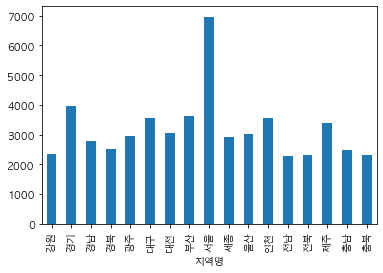

In [18]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
df_last.groupby(["지역명"])["분양가격"].mean().plot.bar()

전용면적별 분양가격의 평균값을 구하고 그래프로 그려봅니다.

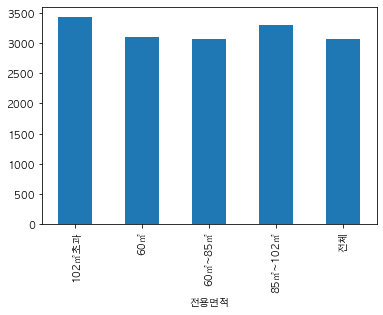

In [19]:
# 전용면적으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
df_last.groupby(["전용면적"])["분양가격"].mean().plot.bar()

## box-and-whisker plot | diagram

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

* [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.


1. 최솟값
1. 제 1사분위수
1. 제 2사분위수( ), 즉 중앙값
1. 제 3 사분위 수( )
1. 최댓값

* Box plot 이해하기 : 
    * [박스 플롯에 대하여 :: -[|]- Box and Whisker](https://boxnwhis.kr/2019/02/19/boxplot.html)
    * [Understanding Boxplots – Towards Data Science](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

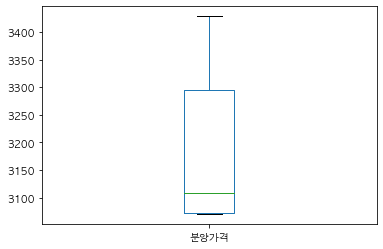

In [20]:
df_last.groupby(["전용면적"])["분양가격"].mean().plot.box(by="규모구분")

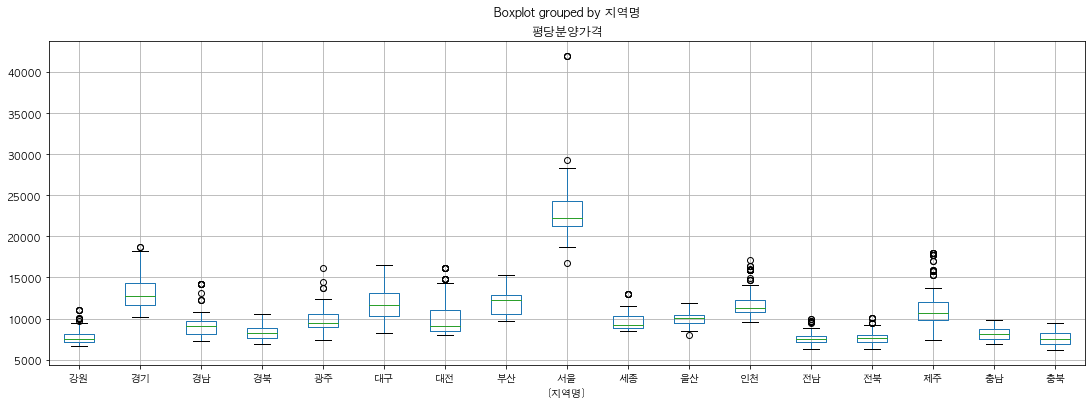

In [21]:
df_last[['지역명', '평당분양가격']].boxplot(by=['지역명'], figsize=(18, 6))

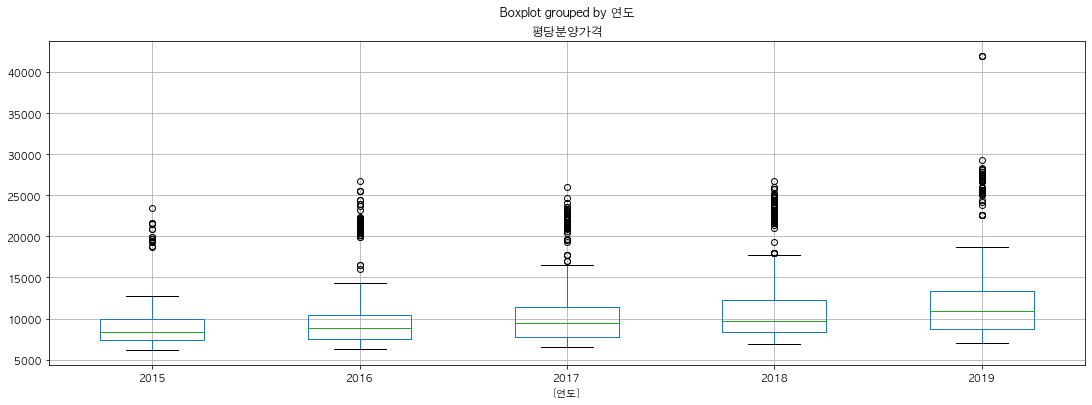

In [22]:
df_last[['연도', '평당분양가격']].boxplot(by=['연도'],figsize=(18, 6))

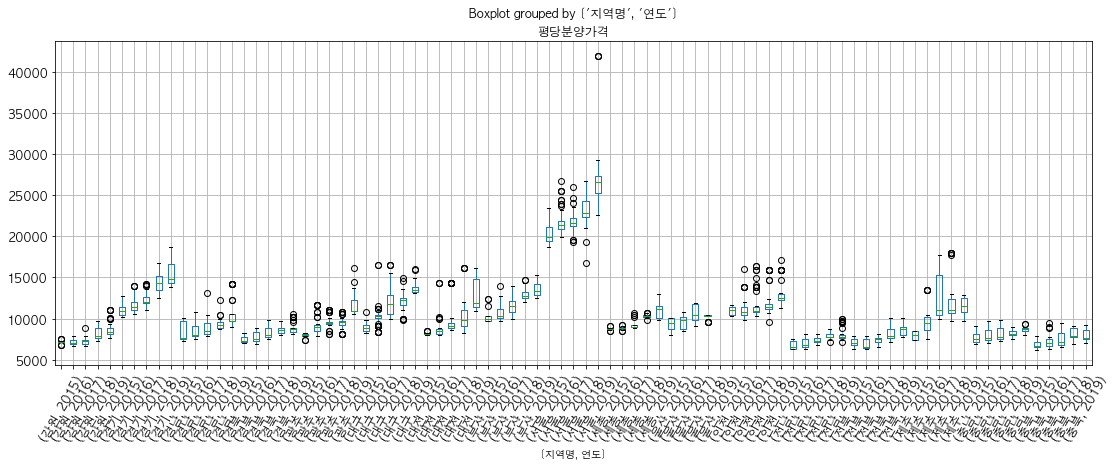

In [23]:
df_last[['연도', '지역명', '평당분양가격']].boxplot(
    by=['지역명', '연도'],
    figsize=(18, 6), 
    fontsize=12,
    rot=60)

In [24]:
df_last_seoul = df_last[df_last['지역명']=='서울']

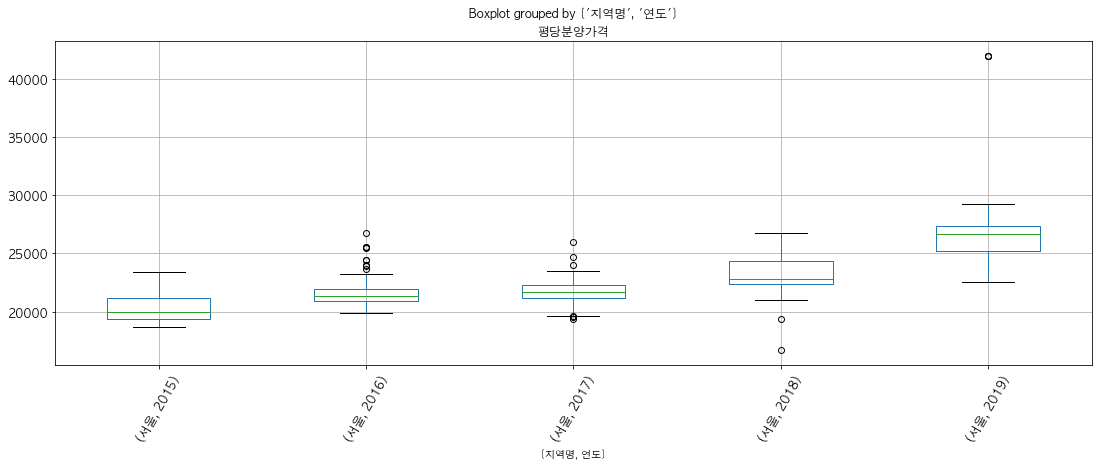

In [25]:
df_last_seoul[['연도', '지역명', '평당분양가격']].boxplot(
    by=['지역명', '연도'],
    figsize=(18, 6), 
    fontsize=12,
    rot=60)

### Seaborn 으로 시각화 해보기

In [26]:
# seaborn 라이브러리 로드
import seaborn as sns

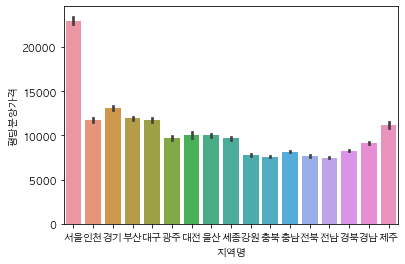

In [27]:
# barplot으로 지역별 평당분양가격을 그려봅니다.
sns.barplot(data=df_last, x="지역명", y="평당분양가격")

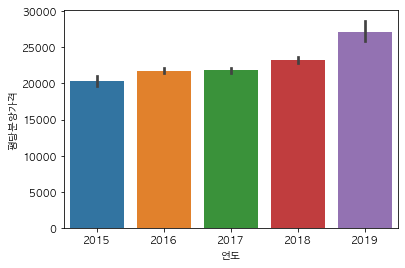

In [28]:
# barplot으로 연도별 평당분양가격을 그려봅니다.
sns.barplot(data=df_last_seoul, x="연도", y="평당분양가격")

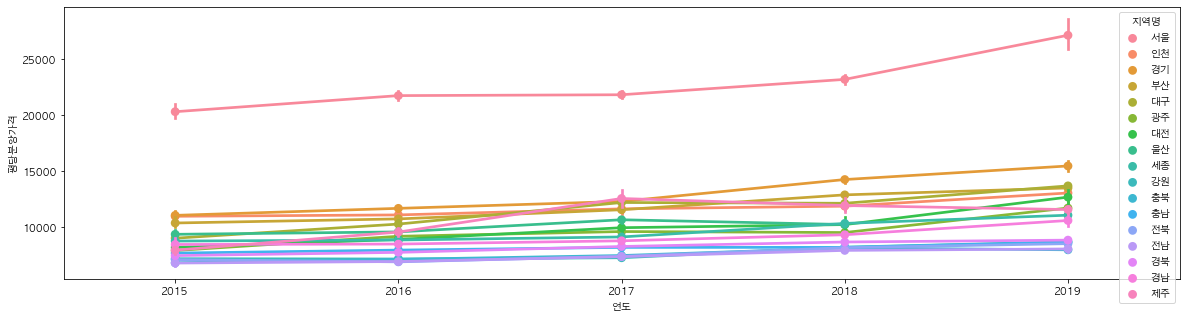

In [29]:
# pointplot으로 연도별 평당분양가격을 그려봅니다.
# hue 옵션을 통해 지역별로 다르게 표시해 봅니다.
plt.figure(figsize=(20, 5))
sns.pointplot(data=df_last, x="연도", y="평당분양가격", hue="지역명")

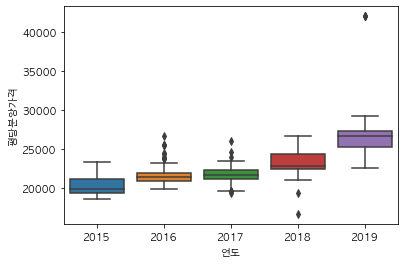

In [30]:
# 연도별 평당분양가격을 boxplot으로 그려봅니다.
sns.boxplot(data=df_last_seoul, x="연도", y="평당분양가격")

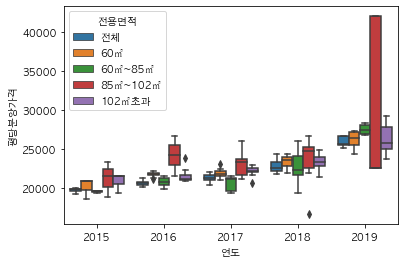

In [31]:
# hue옵션을 주어 전용면적별로 다르게 표시해 봅니다.
sns.boxplot(data=df_last_seoul, x="연도", y="평당분양가격", hue="전용면적")

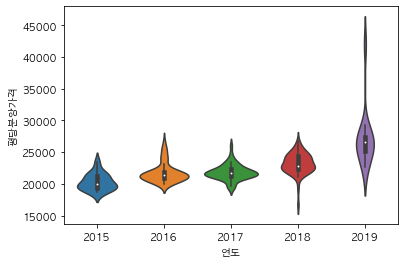

In [32]:
# 연도별 평당분양가격을 violinplot으로 그려봅니다.
sns.violinplot(data=df_last_seoul, x="연도", y="평당분양가격")

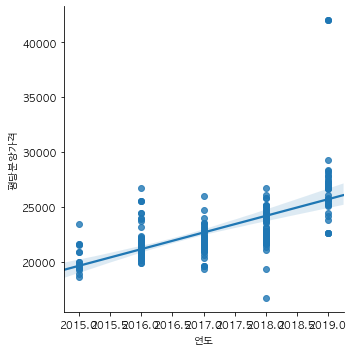

In [33]:
# lmplot은 상관관계를 그려줍니다.
# 연도별 평당분양가격을 lmplot으로 그려봅니다.
sns.lmplot(data=df_last_seoul, x="연도", y="평당분양가격")

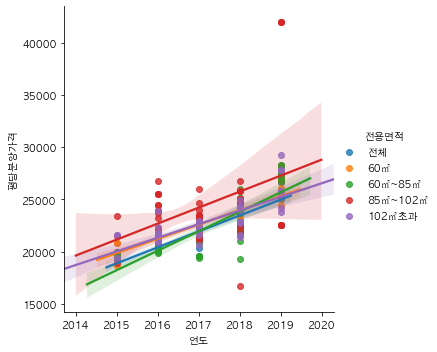

In [34]:
# 연도별 평당분양가격을 lmplot으로 그려봅니다. 
# hue 옵션으로 전용면적을 표현해 봅니다.
sns.lmplot(data=df_last_seoul, x="연도", y="평당분양가격", hue="전용면적")

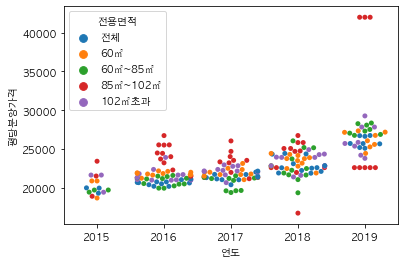

In [35]:
# 연도별 평당분양가격을 swarmplot 으로 그려봅니다. 
# swarmplot은 범주형(카테고리) 데이터의 산점도를 표현하기에 적합합니다.
sns.swarmplot(data=df_last_seoul, x="연도", y="평당분양가격", hue="전용면적")

### 이상치 보기

In [36]:
# 평당분양가격의 최대값을 구해서 max_price 라는 변수에 담습니다.
max_price = df_last_seoul["평당분양가격"].max()
max_price

42002.399999999994

In [37]:
# 서울의 평당분양가격이 특히 높은 데이터가 있습니다. 해당 데이터를 가져옵니다.
df_last_seoul[df_last_seoul["평당분양가격"] == max_price]

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격,전용면적
3743,서울,전용면적 85㎡초과 102㎡이하,2019,6,12728,12728.0,42002.4,85㎡~102㎡
3828,서울,전용면적 85㎡초과 102㎡이하,2019,7,12728,12728.0,42002.4,85㎡~102㎡
3913,서울,전용면적 85㎡초과 102㎡이하,2019,8,12728,12728.0,42002.4,85㎡~102㎡


### 수치데이터 히스토그램 그리기

distplot은 결측치가 있으면 그래프를 그릴 때 오류가 납니다. 
따라서 결측치가 아닌 데이터만 따로 모아서 평당분양가격을 시각화하기 위한 데이터를 만듭니다.
데이터프레임의 .loc를 활용하여 결측치가 없는 데이터에서 평당분양가격만 가져옵니다.

In [38]:
# 결측치가 없는 데이터에서 평당분양가격만 가져옵니다. 그리고 price라는 변수에 담습니다.
price = df_last_seoul.loc[
    df_last_seoul["평당분양가격"].notnull(), "평당분양가격"]
price.head()

0    19275.3
1    18651.6
2    19410.6
3    18879.3
4    19400.7
Name: 평당분양가격, dtype: float64

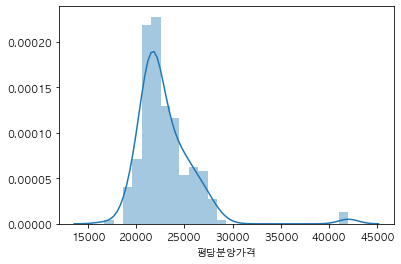

In [39]:
# distplot으로 평당분양가격을 표현해 봅니다.
sns.distplot(price)

In [40]:
# 서울에서 평당분양가격이 결측치가 없는 데이터만 따로 가져옵니다.
df_last_seoul_notnull = df_last_seoul[df_last_seoul["평당분양가격"].notnull()]

In [41]:
# 규모구분(전용면적)별로 value_counts를 사용해서 데이터를 집계해 봅니다.
df_last_seoul_notnull["규모구분"].value_counts()

전용면적 60㎡이하           46
전용면적 102㎡초과          46
전용면적 60㎡초과 85㎡이하     46
전용면적 85㎡초과 102㎡이하    46
전체                   46
Name: 규모구분, dtype: int64

In [42]:
df_60_85 = df_last_seoul_notnull[
    df_last_seoul_notnull["규모구분"] == "전용면적 60㎡초과 85㎡이하"]
df_85_102 = df_last_seoul_notnull[
    df_last_seoul_notnull["규모구분"] == "전용면적 85㎡초과 102㎡이하"]
df_60 = df_last_seoul_notnull[
    df_last_seoul_notnull["규모구분"] == "전용면적 60㎡이하"]
df_102 = df_last_seoul_notnull[
    df_last_seoul_notnull["규모구분"] == "전용면적 102㎡초과"]

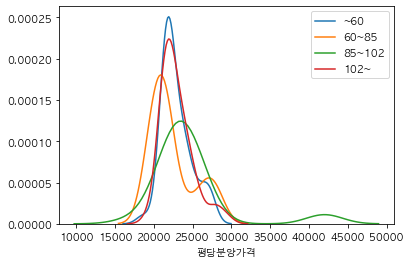

In [43]:
sns.distplot(df_60["평당분양가격"], label="~60", hist=False)
sns.distplot(df_60_85["평당분양가격"], label="60~85", hist=False)
sns.distplot(df_85_102["평당분양가격"], label="85~102", hist=False)
sns.distplot(df_102["평당분양가격"], label="102~", hist=False)

## 2015년 8월 이전 데이터 보기

In [44]:
# df_first 변수에 담겨있는 데이터프레임의 정보를 info를 통해 봅니다.
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
지역          17 non-null object
2013년12월    17 non-null int64
2014년1월     17 non-null int64
2014년2월     17 non-null int64
2014년3월     17 non-null int64
2014년4월     17 non-null int64
2014년5월     17 non-null int64
2014년6월     17 non-null int64
2014년7월     17 non-null int64
2014년8월     17 non-null int64
2014년9월     17 non-null int64
2014년10월    17 non-null int64
2014년11월    17 non-null int64
2014년12월    17 non-null int64
2015년1월     17 non-null int64
2015년2월     17 non-null int64
2015년3월     17 non-null int64
2015년4월     17 non-null int64
2015년5월     17 non-null int64
2015년6월     17 non-null int64
2015년7월     17 non-null int64
2015년8월     17 non-null int64
dtypes: int64(21), object(1)
memory usage: 3.0+ KB


In [45]:
# 결측치가 있는지 봅니다.
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [46]:
df_first.columns

Index(['지역', '2013년12월', '2014년1월', '2014년2월', '2014년3월', '2014년4월', '2014년5월',
       '2014년6월', '2014년7월', '2014년8월', '2014년9월', '2014년10월', '2014년11월',
       '2014년12월', '2015년1월', '2015년2월', '2015년3월', '2015년4월', '2015년5월',
       '2015년6월', '2015년7월', '2015년8월'],
      dtype='object')

pandas의 melt를 사용하면 데이터의 형태를 변경할 수 있습니다. 
df_first 변수에 담긴 데이터프레임은 df_last에 담겨있는 데이터프레임의 모습과 다릅니다. 
같은 형태로 만들어주어야 데이터를 합칠 수 있습니다. 
데이터를 병합하기 위해 melt를 사용해 열에 있는 데이터를 행으로 녹여봅니다.

In [47]:
# pd.melt 를 사용하며, 녹인 데이터는 df_first_melt 변수에 담습니다. 
df_first_melt = pd.melt(df_first, id_vars=['지역'], 
                               value_vars=['2013년12월', '2014년1월', '2014년2월', '2014년3월', '2014년4월', '2014년5월',
       '2014년6월', '2014년7월', '2014년8월', '2014년9월', '2014년10월', '2014년11월',
       '2014년12월', '2015년1월', '2015년2월', '2015년3월', '2015년4월', '2015년5월',
       '2015년6월', '2015년7월', '2015년8월'])
df_first_melt.head(3)

,지역,variable,value
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080


In [48]:
# df_first_melt 변수에 담겨진 컬럼의 이름을 
# ["지역명", "기간", "평당분양가격"] 으로 변경합니다.
df_first_melt.columns = ["지역명", "기간", "평당분양가격"]
df_first_melt.head(1)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189


## 연도와 월을 분리하기

In [49]:
date = "2013년12월"
date

'2013년12월'

In [50]:
# split 을 통해 "년"을 기준으로 텍스트를 분리해 봅니다.
date.split("년")

['2013', '12월']

In [51]:
# 리스트의 인덱싱을 사용해서 연도만 가져옵니다.
date.split("년")[0]

'2013'

In [52]:
# 리스트의 인덱싱과 replace를 사용해서 월을 제거합니다.
date.split("년")[1].replace("월", "")

'12'

In [53]:
# parse_year라는 함수를 만듭니다.
# 연도만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.
def parse_year(date):
    year = date.split("년")[0]
    return int(year)

In [54]:
# 제대로 분리가 되었는지 parse_year 함수를 확인합니다.
parse_year(date)

2013

In [55]:
# parse_month 라는 함수를 만듭니다.
# 월만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.
def parse_month(date):
    month = date.split("년")[1].replace("월", "")
    return int(month)

In [56]:
# 제대로 분리가 되었는지 parse_month 함수를 확인합니다.
parse_month(date)

12

In [57]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 연도만 추출해서 새로운 컬럼에 담습니다.
df_first_melt["연도"] = df_first_melt["기간"].apply(parse_year)
df_first_melt.sample()

,지역명,기간,평당분양가격,연도
242,광주,2015년2월,7756,2015


In [58]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 월만 추출해서 새로운 컬럼에 담습니다.
df_first_melt["월"] = df_first_melt["기간"].apply(parse_month)
df_first_melt.sample()

,지역명,기간,평당분양가격,연도,월
150,경북,2014년8월,6563,2014,8


In [59]:
# df_last와 병합을 하기 위해서는 컬럼의 이름이 같아야 합니다.
# sample을 활용해서 데이터를 미리보기 합니다.
df_last.sample()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격,전용면적
2849,세종,전용면적 102㎡초과,2018,7,3135,3135.0,10345.5,102㎡초과


In [60]:
# df_last와 컬럼명을 맞춰주기 위해 컬럼의 이름을 
# ["지역명", "연도", "월", "평당분양가격"] 으로 변경합니다.
columns = ["지역명", "연도", "월", "평당분양가격"]

In [61]:
# 최근 데이터가 담긴 df_last 에는 전용면적이 있습니다. 
# 이전 데이터에는 전용면적이 없기 때문에 "전체"만 사용하도록 합니다.
# loc를 사용해서 전체에 해당하는 면적만 copy로 복사해서 df_last_prepare 컬럼에 담습니다.
df_last_prepare =  df_last.loc[df_last["전용면적"] == "전체", columns].copy()
df_last_prepare.head(3)

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4


In [62]:
# df_first_melt에서 공통된 컬럼만 가져온 뒤
# copy로 복사해서 df_first_prepare 컬럼에 담습니다.
df_first_prepare =  df_first_melt[columns].copy()
df_first_prepare.head(3)

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080


## concat 으로 데이터 합치기

In [63]:
# df_first_prepare 와 df_last_prepare 를 합쳐줍니다.
df = pd.concat([df_first_prepare, df_last_prepare])
df.shape

(1156, 4)

In [64]:
# 제대로 합쳐졌는지 미리보기를 합니다.
df.head(3)

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0


In [65]:
# 연도별로 데이터가 몇개씩 있는지 value_counts를 통해 세어봅니다.
df["연도"].value_counts()

2018    204
2017    204
2016    204
2014    204
2015    187
2019    136
2013     17
Name: 연도, dtype: int64

### pivot_table 사용하기

In [66]:
# 연도를 인덱스로, 지역명을 컬럼으로 평당분양가격을 피봇테이블로 그려봅니다.
df_year_city = pd.pivot_table(
    df, index="연도", columns="지역명", values="평당분양가격").round(0)
df_year_city

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8103.0,14357.0,9663.0,8582.0,11480.0,13552.0,11752.0,13103.0,25917.0,10913.0,NaN,12430.0,7753.0,8120.0,11812.0,8609.0,7590.0


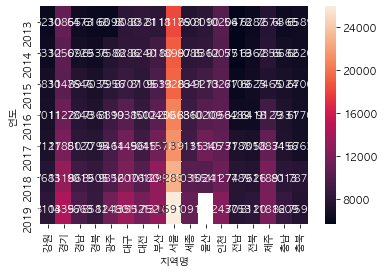

In [67]:
# 위에서 그린 피봇테이블을 히트맵으로 표현해 봅니다.
sns.heatmap(df_year_city, annot=True, fmt=".0f")

In [85]:
# transpose 를 사용하면 행과 열을 바꿔줄 수 있습니다.
df_year_city = df_year_city.transpose()
df_year_city.sort_index()

연도,2013,2014,2015,2016,2017,2018,2019
지역명,,,,,,,
강원,6230.0,6332.0,6831.0,7011.0,7127.0,7681.0,8103.0
경기,10855.0,10509.0,10489.0,11220.0,11850.0,13186.0,14357.0
경남,6473.0,6729.0,7646.0,7848.0,8120.0,9019.0,9663.0
경북,6168.0,6536.0,7035.0,7361.0,7795.0,8505.0,8582.0
광주,6098.0,7588.0,7956.0,8899.0,9464.0,9856.0,11480.0
대구,8080.0,8286.0,8707.0,10310.0,11456.0,12076.0,13552.0
대전,8321.0,8240.0,8105.0,8502.0,9045.0,10180.0,11752.0
부산,8111.0,9180.0,9633.0,10430.0,11578.0,12998.0,13103.0
서울,18189.0,18997.0,19283.0,20663.0,21376.0,22889.0,25917.0


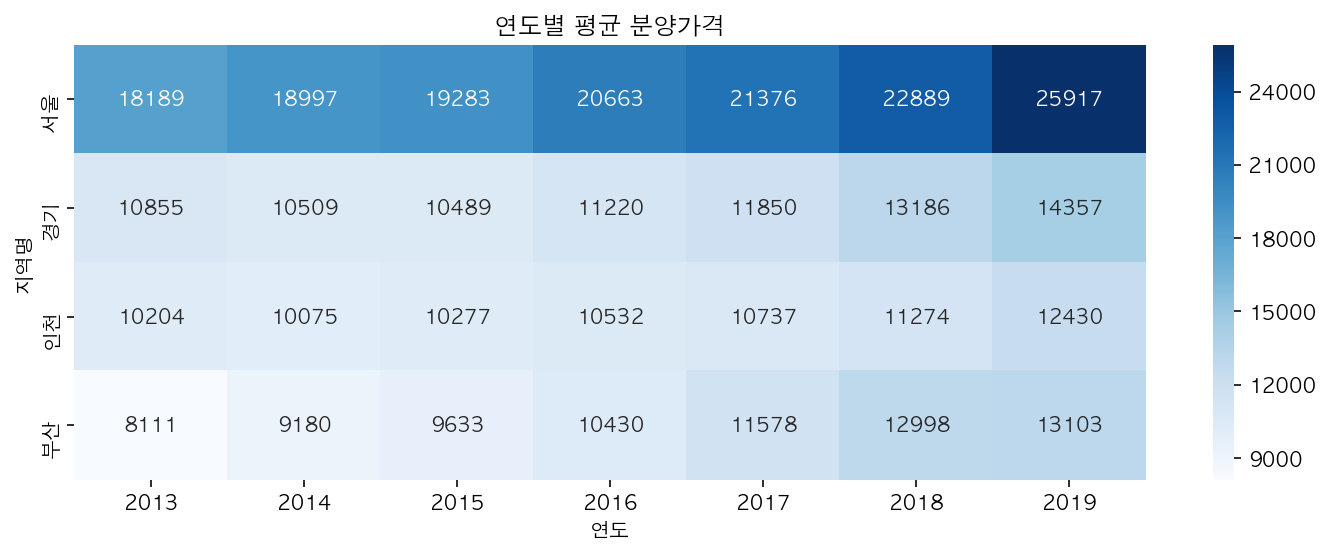

In [92]:
# 바뀐 행과 열을 히트맵으로 표현해 봅니다.
plt.figure(figsize=(12, 4))
plt.title("연도별 평균 분양가격")
h = sns.heatmap(df_year_city.loc[["서울", "경기", "인천", "부산"]], 
            annot=True, fmt='.0f', cmap="Blues")

In [70]:
# 다른형태의 피봇테이블도 그려봅니다. 인덱스에 ["연도", "지역명"] 을 넣고 그려봅니다.
pd.pivot_table(
    df, index=["연도", "지역명"], values="평당분양가격").head()

평당분양가격
연도   지역명         
2013 강원    6230.0
     경기   10855.0
     경남    6473.0
     경북    6168.0
     광주    6098.0

## 2013년부터 최근 데이터까지 시각화하기
### 연도별 평당분양가격 보기

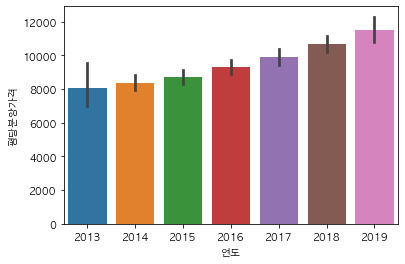

In [71]:
# barplot 으로 연도별 평당분양가격 그리기
sns.barplot(data=df, x="연도", y="평당분양가격")

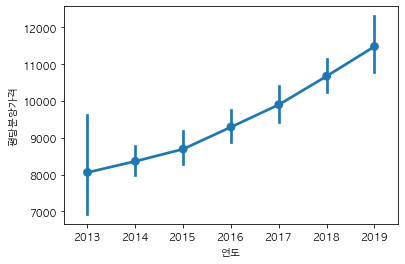

In [72]:
# pointplot 으로 연도별 평당분양가격 그리기
sns.pointplot(data=df, x="연도", y="평당분양가격")

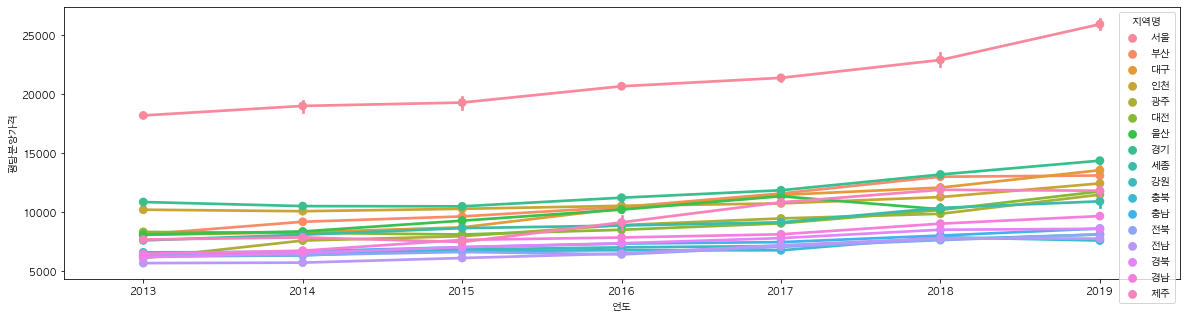

In [73]:
# pointplot 으로 연도별 평당분양가격 그리고 지역별로 표현해 보기
plt.figure(figsize=(20, 5))
sns.pointplot(data=df, x="연도", y="평당분양가격", hue="지역명")

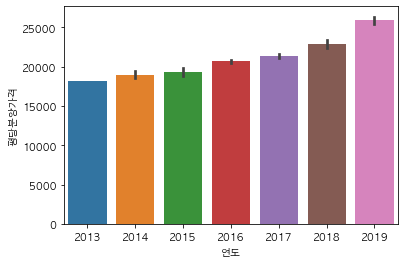

In [74]:
# 서울만 barplot 으로 그리기
sns.barplot(data=df[df["지역명"] == "서울"], x="연도", y="평당분양가격")

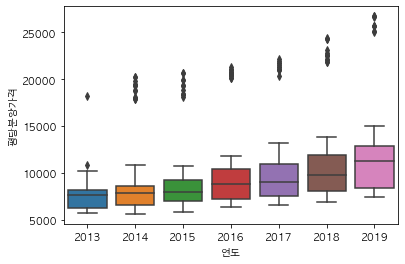

In [75]:
# 연도별 평당분양가격 boxplot 그리기
sns.boxplot(data=df, x="연도", y="평당분양가격")

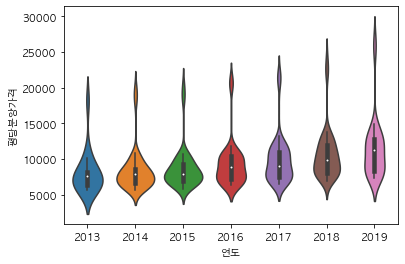

In [76]:
# 연도별 평당분양가격 violinplot 그리기
sns.violinplot(data=df, x="연도", y="평당분양가격")

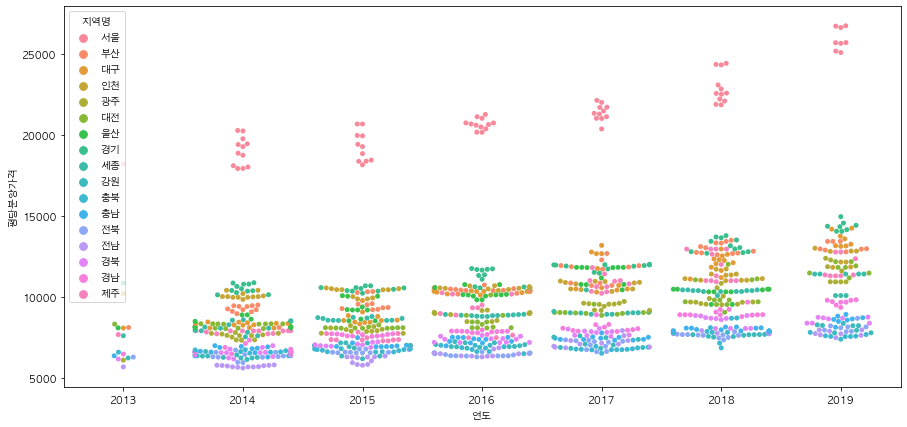

In [77]:
# 연도별 평당분양가격 swarmplot 그리기
plt.figure(figsize=(15, 7))
sns.swarmplot(data=df, x="연도", y="평당분양가격", hue="지역명")

### 지역별 평당분양가격 보기

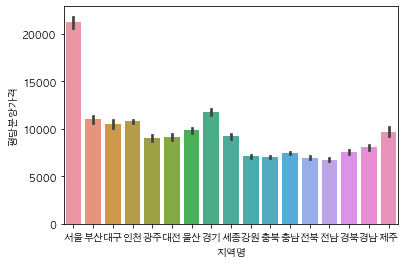

In [78]:
# barplot 으로 지역별 평당분양가격을 그려봅니다.
sns.barplot(data=df, x="지역명", y="평당분양가격")

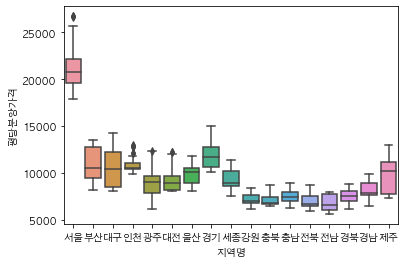

In [79]:
# boxplot 으로 지역별 평당분양가격을 그려봅니다.
sns.boxplot(data=df, x="지역명", y="평당분양가격")

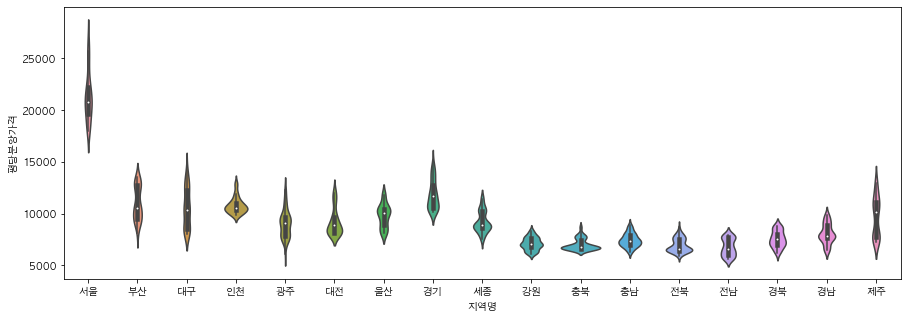

In [80]:
# violinplot 으로 지역별 평당분양가격을 그려봅니다.
# 그래프의 사이즈를 조정하기 위해서는 
# matplotlib의 pyplot을 사용하며 plt 라는 별칭으로 불러왔습니다.
plt.figure(figsize=(15, 5))
sns.violinplot(data=df, x="지역명", y="평당분양가격")

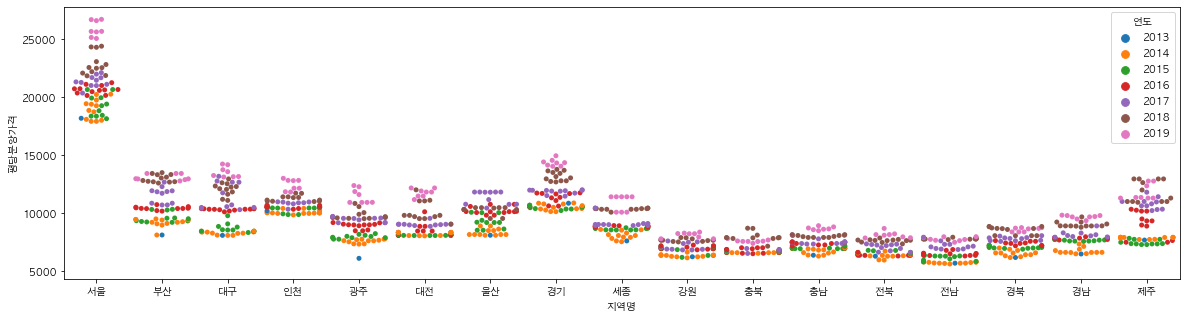

In [81]:
# swarmplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(20, 5))
sns.swarmplot(data=df, x="지역명", y="평당분양가격", hue="연도")